In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
from citipy import citipy
city = citipy.nearest_city(coordinate[0], coordinate[1])

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [32]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fdf62d6d2c1da7c8e3eef9bebb15a147"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fdf62d6d2c1da7c8e3eef9bebb15a147


In [34]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | synya
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | tabas
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | flers
Processing Record 12 of Set 1 | frontera
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | akdepe
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | pestovo
Processing Record 21 of Set 1 | hudson bay
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1 |

Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | hayden
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | baghdad
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | arman
Processing Record 50 of Set 4 | yangjiang
Processing Record 1 of Set 5 | alekseyevsk
Processing Record 2 of Set 5 | mnogovershinnyy
Processing Record 3 of Set 5 | auki
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | jalu
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 | niamey
Processing Record 10 of Set 5 | orimattila
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | kodinsk
Processing Record 13 of Set 

Processing Record 32 of Set 8 | estelle
Processing Record 33 of Set 8 | hovd
Processing Record 34 of Set 8 | samusu
City not found. Skipping...
Processing Record 35 of Set 8 | haibowan
City not found. Skipping...
Processing Record 36 of Set 8 | andros town
Processing Record 37 of Set 8 | muzhappilangad
City not found. Skipping...
Processing Record 38 of Set 8 | saint-augustin
Processing Record 39 of Set 8 | yanan
City not found. Skipping...
Processing Record 40 of Set 8 | idlib
Processing Record 41 of Set 8 | urumqi
Processing Record 42 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 43 of Set 8 | zabaykalsk
Processing Record 44 of Set 8 | worland
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | maracaju
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | belle fourche
Processing Record 49 of Set 8 | shieli
Processing Record 50 of Set 8 | youhao
Processing Record 1 of Set 9 | barawe
City not found. Skipping...
Processing 

Processing Record 13 of Set 12 | guerrero negro
Processing Record 14 of Set 12 | capitao poco
Processing Record 15 of Set 12 | rundu
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | el real de santa maria
Processing Record 18 of Set 12 | mayumba
Processing Record 19 of Set 12 | cururupu
Processing Record 20 of Set 12 | pirogovo
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | qinhuangdao
Processing Record 23 of Set 12 | portree
Processing Record 24 of Set 12 | ola
Processing Record 25 of Set 12 | nanfeng
Processing Record 26 of Set 12 | pokhara
Processing Record 27 of Set 12 | kachug
Processing Record 28 of Set 12 | acari
Processing Record 29 of Set 12 | san jose
Processing Record 30 of Set 12 | sept-iles
Processing Record 31 of Set 12 | stranda
Processing Record 32 of Set 12 | hatillo
Processing Record 33 of Set 12 | naze
Processing Record 34 of Set 12 | aksu
Processing Record 35 of Set 12 | tunduru
City not 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,86.16,84,20,10.36,TO,2022-01-25 02:15:57
1,Cape Town,-33.9258,18.4232,69.89,87,14,4.00,ZA,2022-01-25 02:12:42
2,Rikitea,-23.1203,-134.9692,78.48,72,100,18.61,PF,2022-01-25 02:11:40
3,Synya,65.3718,58.0387,15.91,91,100,14.85,RU,2022-01-25 02:15:57
4,Vao,-22.6667,167.4833,77.38,67,15,6.44,NC,2022-01-25 02:15:57
5,Tiksi,71.6872,128.8694,-8.16,97,100,9.22,RU,2022-01-25 02:15:58
6,Husavik,66.0449,-17.3389,39.11,80,100,10.54,IS,2022-01-25 02:15:58
7,Tabas,33.5959,56.9244,41.27,26,0,1.03,IR,2022-01-25 02:15:58
8,Qaanaaq,77.4840,-69.3632,-15.59,64,17,7.72,GL,2022-01-25 02:15:59
9,Flers,48.7372,-0.5747,28.65,86,0,1.32,FR,2022-01-25 02:15:59


In [42]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-25 02:15:57,-21.2000,-175.2000,86.16,84,20,10.36
1,Cape Town,ZA,2022-01-25 02:12:42,-33.9258,18.4232,69.89,87,14,4.00
2,Rikitea,PF,2022-01-25 02:11:40,-23.1203,-134.9692,78.48,72,100,18.61
3,Synya,RU,2022-01-25 02:15:57,65.3718,58.0387,15.91,91,100,14.85
4,Vao,NC,2022-01-25 02:15:57,-22.6667,167.4833,77.38,67,15,6.44
5,Tiksi,RU,2022-01-25 02:15:58,71.6872,128.8694,-8.16,97,100,9.22
6,Husavik,IS,2022-01-25 02:15:58,66.0449,-17.3389,39.11,80,100,10.54
7,Tabas,IR,2022-01-25 02:15:58,33.5959,56.9244,41.27,26,0,1.03
8,Qaanaaq,GL,2022-01-25 02:15:59,77.4840,-69.3632,-15.59,64,17,7.72
9,Flers,FR,2022-01-25 02:15:59,48.7372,-0.5747,28.65,86,0,1.32


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

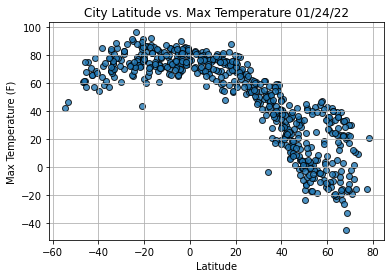

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

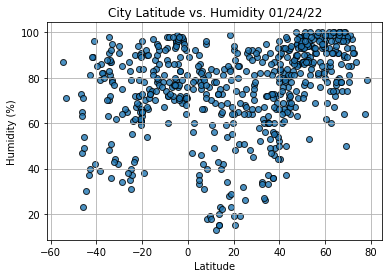

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

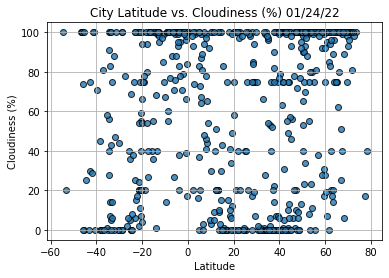

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

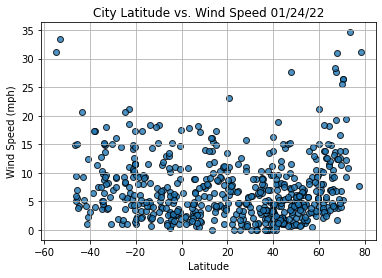

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2022-01-25 02:16:00
Lat                       22.0752
Lng                      -159.319
Max Temp                    78.78
Humidity                       65
Cloudiness                     40
Wind Speed                   1.01
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
579    False
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Synya,RU,2022-01-25 02:15:57,65.3718,58.0387,15.91,91,100,14.85
5,Tiksi,RU,2022-01-25 02:15:58,71.6872,128.8694,-8.16,97,100,9.22
6,Husavik,IS,2022-01-25 02:15:58,66.0449,-17.3389,39.11,80,100,10.54
7,Tabas,IR,2022-01-25 02:15:58,33.5959,56.9244,41.27,26,0,1.03
8,Qaanaaq,GL,2022-01-25 02:15:59,77.4840,-69.3632,-15.59,64,17,7.72


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

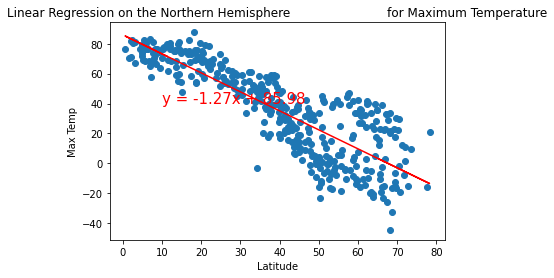

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


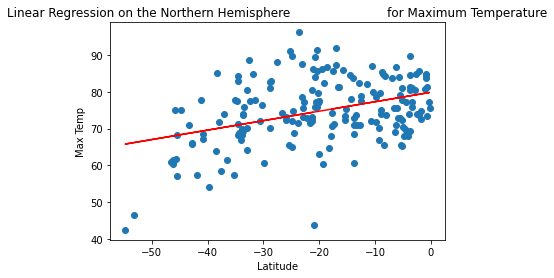

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


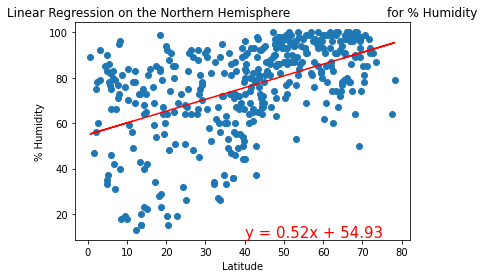

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

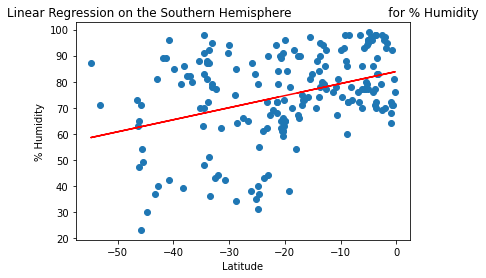

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

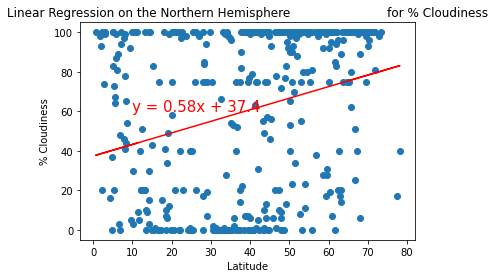

In [75]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

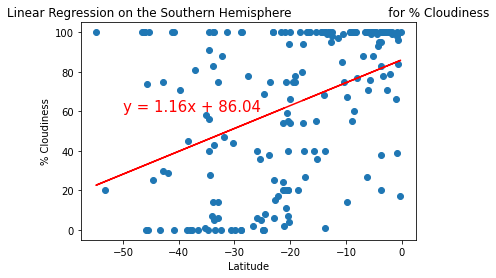

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


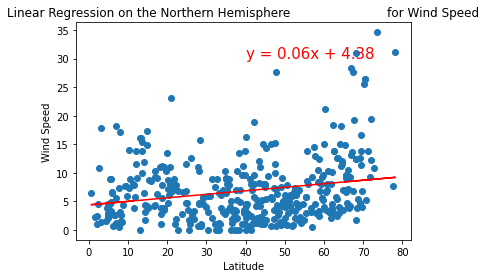

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

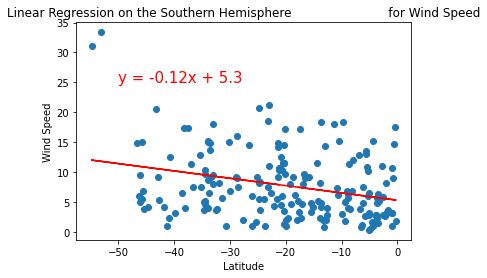

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))